In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

In [17]:
data = BinaryIV.generate_response_type_data(N_simulations=100)
data

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,help_frac,response_type_dist,response_type_counts
0,None,None,None,None,None,None,None,-0.324,0.000,0.374,0.698,0.5,0.5,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...",0.999261,0.992184,0.999261,0.993886,0.000000,"[0.3333333333333333, 0.0, 0.3333333333333333, ...","{'(0, 0)': 151, '(0, 1)': 0, '(1, 0)': 162, '(..."
1,None,None,None,None,None,None,None,-0.272,0.018,0.366,0.638,0.5,0.5,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...","[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, ...","[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.997043,0.999815,0.997043,0.999711,0.010101,"[0.32996632996632996, 0.010101010101010102, 0....","{'(0, 0)': 172, '(0, 1)': 9, '(1, 0)': 145, '(..."
2,None,None,None,None,None,None,None,-0.286,0.010,0.372,0.658,0.5,0.5,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.999896,0.999434,0.999896,0.999584,0.020202,"[0.3265993265993266, 0.020202020202020204, 0.3...","{'(0, 0)': 166, '(0, 1)': 5, '(1, 0)': 148, '(..."
3,None,None,None,None,None,None,None,-0.318,0.028,0.334,0.652,0.5,0.5,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, ...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.999988,0.999896,0.999988,0.999434,0.030303,"[0.32323232323232326, 0.030303030303030304, 0....","{'(0, 0)': 160, '(0, 1)': 14, '(1, 0)': 173, '..."
4,None,None,None,None,None,None,None,-0.268,0.046,0.374,0.642,0.5,0.5,"[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",0.997737,0.998049,0.997737,0.999896,0.040404,"[0.31986531986531985, 0.04040404040404041, 0.3...","{'(0, 0)': 156, '(0, 1)': 23, '(1, 0)': 157, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,None,None,None,None,None,None,0.934,0.952,0.964,0.030,0.5,0.5,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",0.999434,0.999896,0.999434,0.999896,0.959596,"[0.013468013468013443, 0.9595959595959597, 0.0...","{'(0, 0)': 9, '(0, 1)': 476, '(1, 0)': 9, '(1,..."
96,None,None,None,None,None,None,None,0.964,0.970,0.984,0.020,0.5,0.5,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...",0.996662,0.999434,0.996662,0.996662,0.969697,"[0.010101010101010091, 0.9696969696969697, 0.0...","{'(0, 0)': 5, '(0, 1)': 485, '(1, 0)': 3, '(1,..."
97,None,None,None,None,None,None,None,0.980,0.982,0.988,0.008,0.5,0.5,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...","[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...",1.000000,0.998603,1.000000,0.999711,0.979798,"[0.006734006734006703, 0.9797979797979799, 0.0...","{'(0, 0)': 5, '(0, 1)': 491, '(1, 0)': 1, '(1,..."
98,None,None,None,None,None,None,None,0.988,0.990,0.994,0.006,0.5,0.5,"[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...","[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...",0.999954,0

In [15]:
binaryIV = BinaryIV('IV Dag', data)

algorithms = [alg for alg in binaryIV.get_algorithms('PNS') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run_all_bounding_algorithms(algorithms)

Running PNS_causaloptim...
PNS_causaloptim completed in 30.26 seconds.
Running PNS_autobound...
PNS_autobound completed in 27.45 seconds.
Running PNS_entropybounds-0.80...
PNS_entropybounds-0.80 completed in 2.82 seconds.
Running PNS_entropybounds-0.20...
PNS_entropybounds-0.20 completed in 3.77 seconds.
Running PNS_entropybounds-0.10...
PNS_entropybounds-0.10 completed in 4.32 seconds.
Running PNS_nonpara...
PNS_nonpara completed in 0.04 seconds.
Total runtime: 68.68 seconds.


Algorithm: PNS_causaloptim
  Fail Rate: 98.00%
  Invalid Rate: 50.00%
  Net Bound Width: 0.0
Algorithm: PNS_autobound
  Fail Rate: 0.00%
  Invalid Rate: 1.00%
  Net Bound Width: 0.2759468026804099
Algorithm: PNS_entropybounds-0.80
  Fail Rate: 0.00%
  Invalid Rate: 0.00%
  Net Bound Width: 0.8339593124302273
Algorithm: PNS_entropybounds-0.20
  Fail Rate: 0.00%
  Invalid Rate: 2.00%
  Net Bound Width: 0.7726277833369991
Algorithm: PNS_entropybounds-0.10
  Fail Rate: 0.00%
  Invalid Rate: 0.00%
  Net Bound Width: 0.6734050609043032
Algorithm: PNS_zaffalonbounds not found in dataframe columns.
Algorithm: PNS_nonpara
  Fail Rate: 0.00%
  Invalid Rate: 1.00%
  Net Bound Width: 0.27594680268040983


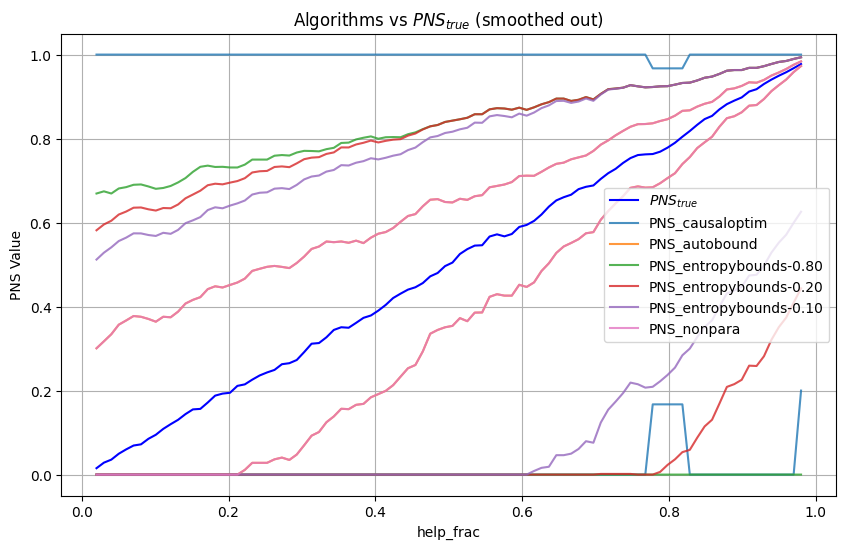

In [16]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('PNS')
PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'PNS', ate_algs, 5, False, 'help_frac')

In [12]:
invalids = binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False]
invalIV = BinaryIV('IV Dag', invalids)
invalIV.bound_ate_causaloptim()
invalIV.data

KeyError: 'causaloptim_bound_valid'

In [7]:
binaryIV.data

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,ATE_2SLS_0.99_bound_lower,ATE_2SLS_0.99_bound_upper,ATE_2SLS_0.99_bound_valid,ATE_2SLS_0.99_bound_width,ATE_2SLS_0.99_bound_failed,ATE_2SLS_0.98_bound_lower,ATE_2SLS_0.98_bound_upper,ATE_2SLS_0.98_bound_valid,ATE_2SLS_0.98_bound_width,ATE_2SLS_0.98_bound_failed,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,ATE_entropybounds_0.80_bound_lower,ATE_entropybounds_0.80_bound_upper,ATE_entropybounds_0.80_bound_valid,ATE_entropybounds_0.80_bound_width,ATE_entropybounds_0.80_bound_failed,ATE_entropybounds_0.20_bound_lower,ATE_entropybounds_0.20_bound_upper,ATE_entropybounds_0.20_bound_valid,ATE_entropybounds_0.20_bound_width,ATE_entropybounds_0.20_bound_failed,ATE_entropybounds_0.10_bound_lower,ATE_entropybounds_0.10_bound_upper,ATE_entropybounds_0.10_bound_valid,ATE_entropybounds_0.10_bound_width,ATE_entropybounds_0.10_bound_failed,PNS_entropybounds_0.80_bound_lower,PNS_entropybounds_0.80_bound_upper,PNS_entropybounds_0.80_bound_valid,PNS_entropybounds_0.80_bound_width,PNS_entropybounds_0.80_bound_failed,PNS_entropybounds_0.20_bound_lower,PNS_entropybounds_0.20_bound_upper,PNS_entropybounds_0.20_bound_valid,PNS_entropybounds_0.20_bound_width,PNS_entropybounds_0.20_bound_failed,PNS_entropybounds_0.10_bound_lower,PNS_entropybounds_0.10_bound_upper,PNS_entropybounds_0.10_bound_valid,PNS_entropybounds_0.10_bound_width,PNS_entropybounds_0.10_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid,PNS_manski_bound_lower,PNS_manski_bound_upper,PNS_manski_bound_width,PNS_manski_bound_failed,PNS_manski_bound_valid
0,866034,0,0,-0.262467,-1.262984,-5.0,0.825349,-0.655176,0.004444,0.014015,0.669191,0.861371,0.742232,"[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...","[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...",0.835666,0.568307,0.733767,0.988149,-1.000000,0.455757,True,1.455757,False,-1.000000,0.322277,True,1.322277,False,-0.762943,0.147692,True,0.910635,False,0.000000,0.225564,True,0.225564,False,-0.762943,0.156461,True,0.919403,False,-0.0,0.225564,True,0.225564,False,-0.601000,0.399001,False,1.000001,False,-0.601000,0.064899,False,0.665899,False,-0.584047,-0.128591,False,0.455456,False,0.0,0.437997,True,0.437997,False,3.540999e-07,0.405555,True,0.405555,False,0.000000e+00,0.326344,True,0.326344,False,-0.7028,0.1037,True,0.8065,False,0.000,0.2338,True,0.2338,False,-0.980583,-0.415617,0.564965,False,True,0.000000,0.009709,0.009709,False,True
1,888429,0,0,1.382871,-2.245376,0.0,0.066512,0.000000,0.249788,0.512732,0.512732,0.745821,0.706355,"[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...","[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...","[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...",0.868721,0.784919,0.959442,0.998846,-0.163517,0.581715,True,0.745232,False,-0.127428,0.545625,True,0.673053,False,-0.258766,0.397475,True,0.656241,False,0.155027,0.503448,True,0.348422,Fa

In [ ]:
df = pd.read_pickle('results_20250516_133621.pkl')

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,ATE_2SLS_0.99_bound_lower,ATE_2SLS_0.99_bound_upper,ATE_2SLS_0.99_bound_valid,ATE_2SLS_0.99_bound_width,ATE_2SLS_0.99_bound_failed,ATE_2SLS_0.98_bound_lower,ATE_2SLS_0.98_bound_upper,ATE_2SLS_0.98_bound_valid,ATE_2SLS_0.98_bound_width,ATE_2SLS_0.98_bound_failed,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,ATE_entropybounds_0.80_bound_lower,ATE_entropybounds_0.80_bound_upper,ATE_entropybounds_0.80_bound_valid,ATE_entropybounds_0.80_bound_width,ATE_entropybounds_0.80_bound_failed,ATE_entropybounds_0.20_bound_lower,ATE_entropybounds_0.20_bound_upper,ATE_entropybounds_0.20_bound_valid,ATE_entropybounds_0.20_bound_width,ATE_entropybounds_0.20_bound_failed,ATE_entropybounds_0.10_bound_lower,ATE_entropybounds_0.10_bound_upper,ATE_entropybounds_0.10_bound_valid,ATE_entropybounds_0.10_bound_width,ATE_entropybounds_0.10_bound_failed,PNS_entropybounds_0.80_bound_lower,PNS_entropybounds_0.80_bound_upper,PNS_entropybounds_0.80_bound_valid,PNS_entropybounds_0.80_bound_width,PNS_entropybounds_0.80_bound_failed,PNS_entropybounds_0.20_bound_lower,PNS_entropybounds_0.20_bound_upper,PNS_entropybounds_0.20_bound_valid,PNS_entropybounds_0.20_bound_width,PNS_entropybounds_0.20_bound_failed,PNS_entropybounds_0.10_bound_lower,PNS_entropybounds_0.10_bound_upper,PNS_entropybounds_0.10_bound_valid,PNS_entropybounds_0.10_bound_width,PNS_entropybounds_0.10_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid,PNS_manski_bound_lower,PNS_manski_bound_upper,PNS_manski_bound_width,PNS_manski_bound_failed,PNS_manski_bound_valid
0,584330,0,0,-1.324753,0.587608,-5.0,0.549802,-0.498218,0.003380,0.006877,0.505095,0.041221,0.958638,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, ...",0.260341,0.233046,0.763803,0.973242,-1.000000,0.220164,True,1.220164,False,-1.000000,0.153104,True,1.153104,False,-0.619247,-0.063522,True,0.555725,False,0.0,0.227273,True,0.227273,False,-0.619247,0.089958,True,0.709205,False,-0.0,0.227273,True,0.227273,False,-0.610997,0.389001,True,0.999998,False,-0.611000,0.020827,True,0.631827,False,-0.590636,-0.172385,True,0.418251,False,0.0,0.595999,True,0.595999,False,1.620185e-09,0.523330,True,0.523330,False,0.0,0.276211,True,0.276211,False,-0.5293,0.1054,True,0.6347,False,0.0000,0.3715,True,0.3715,False,-1.000000,-0.03856,0.96144,False,True,0.0,0.000000,0.000000,False,False
1,611453,0,0,-1.186276,-1.461090,0.0,1.485556,0.000000,0.234481,0.549204,0.549204,0.147849,0.499272,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",0.998049,0.624654,0.930445,0.985815,-0.783941,0.177900,True,0.961841,False,-0.737361,0.131321,True,0.868682,False,-0.484430,0.274935,True,0.759365,False,0.0,0.426160,True,0.426160,False,-0.484430,0.274935,Tru